<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 2. Визуальный анализ данных
## <center>Практическое задание. Визуальный анализ данных по пассажирам "Титаника". Решение

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Считываем обучающую выборку.**

In [3]:
train_df = pd.read_csv("../../data/titanic_train.csv", 
                       index_col='PassengerId') 

In [3]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Kelly, Miss. Anna Katherine ""Annie Kate""",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Выкинем признак `Cabin`, а потом – все строки, где есть пропуски.**

In [6]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

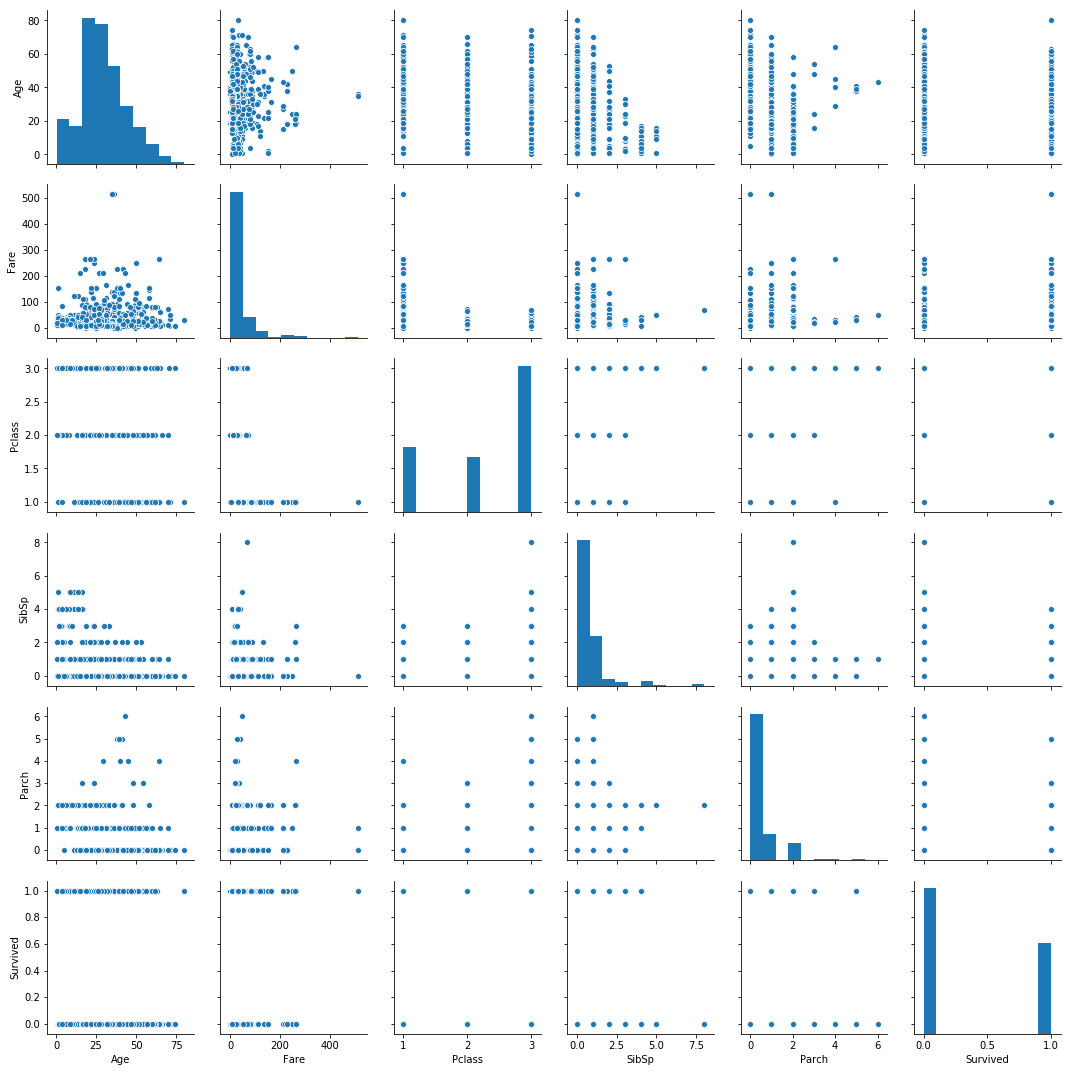

In [9]:
%config InlineBack.figure_format = 'png'
sns.pairplot(train_df[['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']]);

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

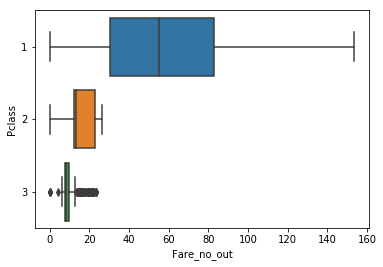

In [37]:
sns.boxplot(y = 'Pclass', x = 'Fare_no_out', data = train_df, orient = 'h')

**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

In [36]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = fare_pclass1.apply(lambda f1: f1 if f1 <= fare_pclass1.std() *2 else np.NaN).dropna()
fare_pclass2_no_out = fare_pclass2.apply(lambda f2: f2 if f2 <= fare_pclass2.std() *2 else np.NaN).dropna()
fare_pclass3_no_out = fare_pclass3.apply(lambda f3: f3 if f3 <= fare_pclass3.std() *2 else np.NaN).dropna()
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
                                             .append(fare_pclass3_no_out)

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

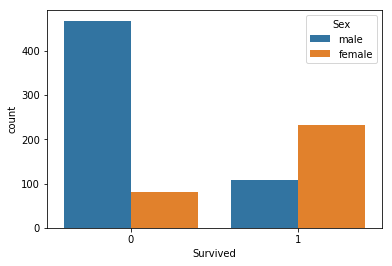

In [38]:
sns.countplot(x = "Survived", hue = "Sex", data = train_df)

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

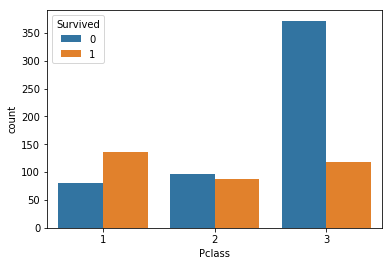

In [39]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = train_df)

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

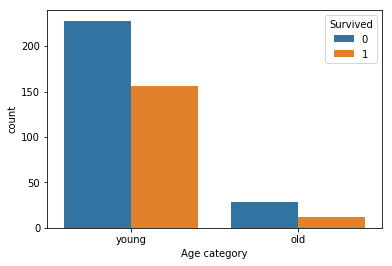

In [41]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 'young'
    elif age > 55:
        return 'old'
    else:
        return np.NaN
train_df['Age category']=train_df['Age'].apply(age_category).dropna()
sns.countplot(x = 'Age category', hue = 'Survived', data = train_df)